### Machine Learning using Regression models

### Date: Jun 01, 2025

### Author: Hincal Topcuoglu, Ph.D.

In this notebook, we learn how to implement k-means clustering. We will also get to know principal component analysis and explore how to use the results of both methods in supervised machine learning models.

K-Means Clustering

What it is:

An unsupervised learning algorithm used to partition data into K distinct clusters based on feature similarity.

Use cases:

Customer segmentation, image compression, anomaly detection, and more.

Principal Component Analysis (PCA)

What it is:

A dimensionality reduction technique that transforms correlated features into a smaller number of uncorrelated principal components.

Goal:

Reduce dimensionality while preserving as much variance (information) as possible.

Use cases:

Data visualization, noise reduction, speeding up machine learning algorithms, feature extraction.

---

We start by loading the required libraries.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report)
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.float_format', '{:.3f}'.format)

We work with the titantic data and prepare it as we have done previously.

In [2]:
titanic = pd.read_csv('titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [3]:
## check size of data
len(titanic)

891

In [4]:
## check null counts
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Hincal Comment:

Since there are so much null values in "Cabin" variable, I will drop it, and fill the "Age" with median. Why median instead of mean ? Because median is robust to outliers

In [5]:
# Drop a Cabin column
titanic = titanic.drop('Cabin', axis=1)

In [6]:
# Fill nulls with median
titanic['Age_imp'] = titanic['Age'].fillna(titanic['Age'].median())
titanic = titanic.drop('Age', axis=1)

In [7]:
# check nulls again
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Age_imp        0
dtype: int64

In [8]:
## drop these 2 rows
titanic = titanic.dropna()

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_imp        0
dtype: int64

In [9]:
# print size of data
len(titanic)

889

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_imp
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.250,S,22.000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.283,C,38.000
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.925,S,26.000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.100,S,35.000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.050,S,35.000


Hincal Comment:
Since here the purporse is to illustrate K-Means and PCA algorithms, this data is created for predicting "Survived" target column. So here is also a classificiation problem

In [11]:
# Hincal Comment:
# We dont need here "Name", "Ticket" columns, they are needless, so I drop them too.
titanic = titanic.drop(['Name', 'Ticket'], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_imp
0,1,0,3,male,1,0,7.250,S,22.000
1,2,1,1,female,1,0,71.283,C,38.000
2,3,1,3,female,0,0,7.925,S,26.000
3,4,1,1,female,1,0,53.100,S,35.000
4,5,0,3,male,0,0,8.050,S,35.000


In [12]:
# lets get descriptive statistics
titanic.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_imp
count,889.000,889.000,889.000,889.000,889.000,889.000,889.000
mean,446.000,0.382,2.312,0.524,0.382,32.097,29.315
std,256.998,0.486,0.835,1.104,0.807,49.698,12.985
min,1.000,0.000,1.000,0.000,0.000,0.000,0.420
25%,224.000,0.000,2.000,0.000,0.000,7.896,22.000
50%,446.000,0.000,3.000,0.000,0.000,14.454,28.000
75%,668.000,1.000,3.000,1.000,0.000,31.000,35.000
max,891.000,1.000,3.000,8.000,6.000,512.329,80.000


Hincal Comment:

Here we do not take care about PassengerId, Survived, Pclass columns, they are categoric ones

On the other hand, I think SibSp may be means that "children count" and it varies more than its mean. 

The Parch value varies more than its mean too. 

This means that they might be high variance issues on these 2 variables, Age_Imp looks ok for now

In [13]:
## lets look at SibSp
titanic.groupby('SibSp')['PassengerId'].count()

SibSp
0    606
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64

Hincal Comment:

I will take it as categoric column, because it is grouping indicates something informative, can be used in modelling, because it has a decreasing binning behaviour for each class

In [14]:
## look at Sex column
titanic.groupby('Sex')['PassengerId'].count()

Sex
female    312
male      577
Name: PassengerId, dtype: int64

Hincal Commnt:

Distribution of this categoric variable may be useful in modelling

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_imp
0,1,0,3,male,1,0,7.250,S,22.000
1,2,1,1,female,1,0,71.283,C,38.000
2,3,1,3,female,0,0,7.925,S,26.000
3,4,1,1,female,1,0,53.100,S,35.000
4,5,0,3,male,0,0,8.050,S,35.000


Hincal Comment:

While I will keep original variables as they are, I will calculate new features to use in K-Means and PCA

Feature Engineering & Numeric Conversion

Convert categorical variables to numeric (e.g., one-hot encoding for Sex, Embarked).

Extract or create numeric features (e.g., FamilySize = SibSp + Parch + 1).

Use continuous features like Age, Fare.

Hincal Comment:

I learned the meaning of the SibSp and Parch variables:

SibSp stands for "Number of Siblings/Spouses aboard" — it indicates how many siblings or spouses a passenger had on board.

Parch stands for "Number of Parents/Children aboard" — it shows how many parents or children a passenger had on board.

So I will handle them as numeric columns

In [16]:
# One-hot encode 'Sex' and 'Embarked' columns
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

# Extract or create numeric features (e.g., FamilySize = SibSp + Parch + 1).
# Create FamilySize feature
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_imp,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,1,0,7.250,22.000,True,False,True,2
1,2,1,1,1,0,71.283,38.000,False,False,False,2
2,3,1,3,0,0,7.925,26.000,False,False,True,1
3,4,1,1,1,0,53.100,35.000,False,False,True,2
4,5,0,3,0,0,8.050,35.000,True,False,True,1


In [17]:
# So as I implied above, Fare columns has more std than its mean I will standardize it.
# I didnt touch SibSp and Parch variables becasuse their meaning is different and have already used in creating new column

scaler = StandardScaler()

# scaling Fare
titanic['Fare_scaled'] = scaler.fit_transform(titanic[['Fare']])

# Check the data
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_imp,Sex_male,Embarked_Q,Embarked_S,FamilySize,Fare_scaled
0,1,0,3,1,0,7.250,22.000,True,False,True,2,-0.500
1,2,1,1,1,0,71.283,38.000,False,False,False,2,0.789
2,3,1,3,0,0,7.925,26.000,False,False,True,1,-0.487
3,4,1,1,1,0,53.100,35.000,False,False,True,2,0.423
4,5,0,3,0,0,8.050,35.000,True,False,True,1,-0.484


In [18]:
## check descriptives
titanic.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_imp,FamilySize,Fare_scaled
count,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000
mean,446.000,0.382,2.312,0.524,0.382,32.097,29.315,1.907,0.000
std,256.998,0.486,0.835,1.104,0.807,49.698,12.985,1.615,1.001
min,1.000,0.000,1.000,0.000,0.000,0.000,0.420,1.000,-0.646
25%,224.000,0.000,2.000,0.000,0.000,7.896,22.000,1.000,-0.487
50%,446.000,0.000,3.000,0.000,0.000,14.454,28.000,1.000,-0.355
75%,668.000,1.000,3.000,1.000,0.000,31.000,35.000,2.000,-0.022
max,891.000,1.000,3.000,8.000,6.000,512.329,80.000,11.000,9.669


Hincal Comment:

There is already a variation in Fare_scaled, it is good to scale it because before applying K-Means and PCA, it is general approach to scale them but not a strict rule

In [19]:
## Scale Age_Imp also
titanic['Age_imp_scaled'] = scaler.fit_transform(titanic[['Age_imp']])

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_imp,Sex_male,Embarked_Q,Embarked_S,FamilySize,Fare_scaled,Age_imp_scaled
0,1,0,3,1,0,7.250,22.000,True,False,True,2,-0.500,-0.564
1,2,1,1,1,0,71.283,38.000,False,False,False,2,0.789,0.669
2,3,1,3,0,0,7.925,26.000,False,False,True,1,-0.487,-0.255
3,4,1,1,1,0,53.100,35.000,False,False,True,2,0.423,0.438
4,5,0,3,0,0,8.050,35.000,True,False,True,1,-0.484,0.438


In [20]:
# check statistics again
titanic.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_imp,FamilySize,Fare_scaled,Age_imp_scaled
count,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000
mean,446.000,0.382,2.312,0.524,0.382,32.097,29.315,1.907,0.000,0.000
std,256.998,0.486,0.835,1.104,0.807,49.698,12.985,1.615,1.001,1.001
min,1.000,0.000,1.000,0.000,0.000,0.000,0.420,1.000,-0.646,-2.227
25%,224.000,0.000,2.000,0.000,0.000,7.896,22.000,1.000,-0.487,-0.564
50%,446.000,0.000,3.000,0.000,0.000,14.454,28.000,1.000,-0.355,-0.101
75%,668.000,1.000,3.000,1.000,0.000,31.000,35.000,2.000,-0.022,0.438
max,891.000,1.000,3.000,8.000,6.000,512.329,80.000,11.000,9.669,3.906


Hincal Comment:

It is ok for now, we have original and scaled values which we will use in K-Means and PCA.

Since K-Means stands for grouping similar patterns (here is passengers) in to sub groups and PCA stands for dimensionality reduction that means if you have many variables using PCA, you can reduce variable size without loosing variance too much. PCA is good at with working huge number variabled datasets.

On the other hand, about K-Means, one can use its groupings as variable to the model and another can apply seperate models for each K-Means cluster.

In this titanic data, data size is so smaller, so I will only illustrate how it is applied and put it as variable into model

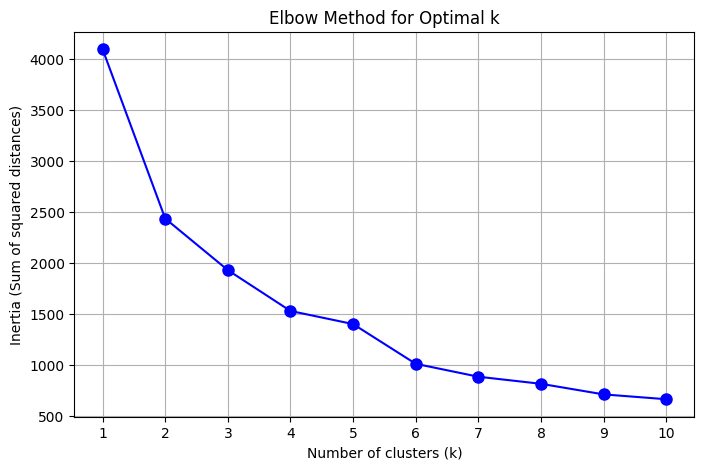

In [21]:
# Firstly I apply here a elbow-plot to decide to split data into how many clusters
# Note : I didnt scale FamilySize, no need for now

# Prepare data for clustering
X_cluster = titanic[['FamilySize', 'Fare_scaled', 'Age_imp_scaled']].dropna()

# Calculate inertia for different k values
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the elbow (knee) graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Hincal Comment:

How to interpret the elbow graph:

The x-axis shows the number of clusters 

The y-axis shows the inertia (sum of squared distances of samples to their closest cluster center).

As k increases, inertia decreases because more clusters reduce within-cluster variance.

The goal is to find the “elbow” or “knee” point where adding more clusters yields diminishing returns (the curve flattens).

Based on the graph:
The inertia sharply decreases from 
k=1 to 𝑘=3

After 
𝑘=3 the decrease in inertia slows down significantly.

This suggests the optimal number of clusters is around 3.

In [22]:
## Applying K-Means

X_cluster = titanic[['FamilySize', 'Fare_scaled', 'Age_imp_scaled']].dropna()

# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster)

# Add cluster labels to the DataFrame
cluster_labels = kmeans.labels_

# Assign cluster labels back to the main DataFrame
# Align indices to ensure correct assignment
titanic.loc[X_cluster.index, 'Cluster'] = cluster_labels

# Show cluster counts
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
cluster_counts

0    219
1    612
2     58
Name: count, dtype: int64

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_imp,Sex_male,Embarked_Q,Embarked_S,FamilySize,Fare_scaled,Age_imp_scaled,Cluster
0,1,0,3,1,0,7.250,22.000,True,False,True,2,-0.500,-0.564,1.000
1,2,1,1,1,0,71.283,38.000,False,False,False,2,0.789,0.669,0.000
2,3,1,3,0,0,7.925,26.000,False,False,True,1,-0.487,-0.255,1.000
3,4,1,1,1,0,53.100,35.000,False,False,True,2,0.423,0.438,0.000
4,5,0,3,0,0,8.050,35.000,True,False,True,1,-0.484,0.438,1.000


In [24]:
#Group by the 'Cluster' column and calculate mean of selected features

cluster_analysis = titanic.groupby('Cluster')[['Fare', 'Age_imp', 'FamilySize']].mean()

print(cluster_analysis)

          Fare  Age_imp  FamilySize
Cluster                            
0.000   72.416   28.953       2.717
1.000   15.757   30.463       1.150
2.000   52.273   18.569       6.828


Hincal Comment:

Cluster 0: highest pay rate, nearmid age with mid family size

Cluster 1: One person, cheapest pay rate, mid rage, small family ( 1 person )

Cluster 2: This is interesting because they pay average rates regard to other cluster values, but age so is at 18 with 6 family size, seems strange to me. 

However here is the purpose is to illustrate how to apply k-means and interpret them.

I will code clusters 0: "avarage-family", 1: "Single Person", 2: "Big Family"

In [25]:
# Select the features used for clustering
X_cluster = titanic[['FamilySize', 'Fare_scaled', 'Age_imp_scaled']].dropna()

# Select the corresponding cluster labels
cluster_labels = titanic.loc[X_cluster.index, 'Cluster']

score = silhouette_score(X_cluster, cluster_labels)
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.4412


Hincal Comment:

Low Silhouette Score, poor seperation

In [26]:
# Get cluster means
cluster_means = titanic.groupby('Cluster')[['Fare', 'Age_imp', 'FamilySize']].mean()

# Create a mapping based on FamilySize or other feature
label_map = {}

for cluster_id, row in cluster_means.iterrows():
    if row['FamilySize'] > 5:
        label_map[cluster_id] = 'Big Family'
    elif row['FamilySize'] < 2:
        label_map[cluster_id] = 'Single Person'
    else:
        label_map[cluster_id] = 'Average Family'

# Map cluster labels to names
titanic['Cluster_Label'] = titanic['Cluster'].map(label_map)

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_imp,Sex_male,Embarked_Q,Embarked_S,FamilySize,Fare_scaled,Age_imp_scaled,Cluster,Cluster_Label
0,1,0,3,1,0,7.250,22.000,True,False,True,2,-0.500,-0.564,1.000,Single Person
1,2,1,1,1,0,71.283,38.000,False,False,False,2,0.789,0.669,0.000,Average Family
2,3,1,3,0,0,7.925,26.000,False,False,True,1,-0.487,-0.255,1.000,Single Person
3,4,1,1,1,0,53.100,35.000,False,False,True,2,0.423,0.438,0.000,Average Family
4,5,0,3,0,0,8.050,35.000,True,False,True,1,-0.484,0.438,1.000,Single Person


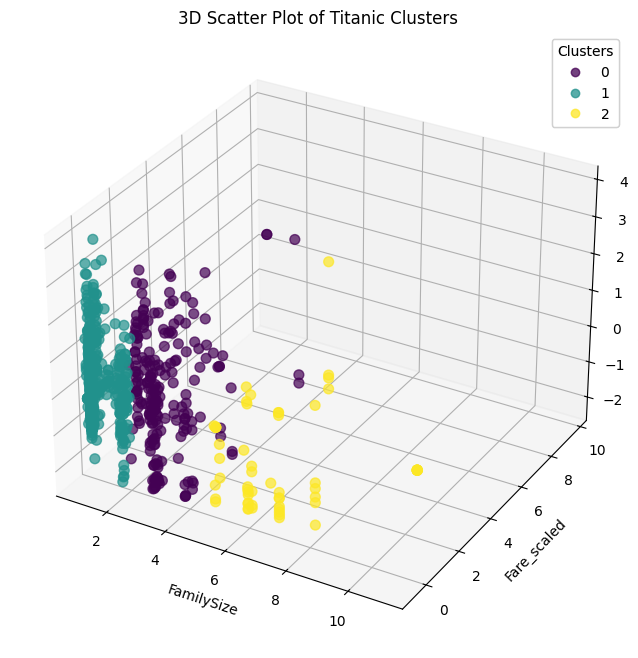

In [27]:
# Prepare data (drop rows with missing values in clustering features)
plot_data = titanic.dropna(subset=['FamilySize', 'Fare_scaled', 'Age_imp_scaled', 'Cluster_Label'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color by cluster
scatter = ax.scatter(
    plot_data['FamilySize'],
    plot_data['Fare_scaled'],
    plot_data['Age_imp_scaled'],
    c=plot_data['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

ax.set_xlabel('FamilySize')
ax.set_ylabel('Fare_scaled')
ax.set_zlabel('Age_imp_scaled')
ax.set_title('3D Scatter Plot of Titanic Clusters')

# Add legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

---

Hincal Comment:

Lets apply also PCA to scaled values

In [28]:
# Prepare data for PCA including FamilySize and scaled features
X_pca = titanic[['FamilySize', 'Fare_scaled', 'Age_imp_scaled']].dropna()

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(X_pca)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=X_pca.index)

# Show explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance, pca_df.head()

(array([0.59855903, 0.23747524]),
      PC1    PC2
 0  0.115 -0.750
 1  0.095  1.034
 2 -0.908 -0.538
 3  0.076  0.609
 4 -1.050 -0.060)

Hincal Comment:
    
The array [0.59855903, 0.23747524] represents the explained variance ratio of the principal components.

PC1 explains about 59.86% of the total variance in the data.

PC2 explains about 23.75% of the variance.

Together, the first two components explain roughly 83.6% of the variance, which is quite good for dimensionality reduction.

In [29]:
## lets append PCA results to main frame
titanic.loc[pca_df.index, 'PC1'] = pca_df['PC1']
titanic.loc[pca_df.index, 'PC2'] = pca_df['PC2']

# Verify by displaying the first few rows
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_imp,Sex_male,Embarked_Q,Embarked_S,FamilySize,Fare_scaled,Age_imp_scaled,Cluster,Cluster_Label,PC1,PC2
0,1,0,3,1,0,7.250,22.000,True,False,True,2,-0.500,-0.564,1.000,Single Person,0.115,-0.750
1,2,1,1,1,0,71.283,38.000,False,False,False,2,0.789,0.669,0.000,Average Family,0.095,1.034
2,3,1,3,0,0,7.925,26.000,False,False,True,1,-0.487,-0.255,1.000,Single Person,-0.908,-0.538
3,4,1,1,1,0,53.100,35.000,False,False,True,2,0.423,0.438,0.000,Average Family,0.076,0.609
4,5,0,3,0,0,8.050,35.000,True,False,True,1,-0.484,0.438,1.000,Single Person,-1.050,-0.060


Hincal Comment:

Since we calculated Clusters, I will put it into model as variable, and for dimensionality reduction I will use PC1 (which explains greater variance) in model.

But first lets apply baseline logistic regression model

In [30]:
cols_to_use = ['Survived','Pclass',
 'Fare','Age_imp',
 'Sex_male','Embarked_Q','Embarked_S',
 'FamilySize','Fare_scaled','Age_imp_scaled','Cluster_Label',
 'PC1','PC2']

What is Logistic Regression?

Logistic regression is a supervised machine learning algorithm used for binary classification problems. It models the probability that a given input belongs to a particular class.

How does it work?

It estimates the log-odds (logit) of the target class as a linear combination of input features.

Key Points:

Outputs probabilities, which can be thresholded to make class predictions.

Coefficients represent the influence of each feature on the log-odds of the outcome.

Can handle both continuous and categorical variables (with encoding).

Assumes a linear relationship between features and the log-odds of the outcome.


Advantages:

Simple and interpretable.

Efficient to train.

Provides probabilistic outputs.

Works well when the relationship between features and log-odds is approximately linear.

In [31]:
# Prepare data (assuming data_encoded and cols_to_use are defined)
df_model = titanic[cols_to_use].dropna()

# Convert categorical variables
df_model['Survived'] = df_model['Survived'].astype('category')
df_model['Pclass'] = df_model['Pclass'].astype('category')
df_model['Cluster_Label'] = df_model['Cluster_Label'].astype('category')

# Target and features
y = df_model['Survived'].cat.codes
X = df_model.drop(columns=['Survived'])

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nTop Coefficients:\n", coef_df.head(10))

Accuracy: 0.8146067415730337
Precision: 0.75
Recall: 0.782608695652174
F1 Score: 0.7659574468085106
ROC AUC: 0.8476931259141072

Confusion Matrix:
 [[91 18]
 [15 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.75      0.78      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178


Top Coefficients:
                         Feature  Coefficient
2                      Sex_male       -2.605
12     Cluster_Label_Big Family       -2.068
11                     Pclass_3       -1.774
10                     Pclass_2       -0.688
13  Cluster_Label_Single Person       -0.650
4                    Embarked_S       -0.421
3                    Embarked_Q       -0.079
5                    FamilySize       -0.071
8                           PC1       -0.066
1          

Hincal Comment:

Model Performance Summary

Accuracy: 81.5% — The model correctly predicts survival status for about 81.5% of passengers.

Precision (Survived=1): 75% — Of those predicted to survive, 75% actually survived.

Recall (Survived=1): 78.3% — The model identifies 78.3% of actual survivors.

F1 Score: 76.6% — Balanced measure of precision and recall.

ROC AUC: 0.85 — Good discrimination ability between survivors and non-survivors.

Confusion matrix:

The model has more false positives (18) than false negatives (15), but both are relatively low.


Feature Importance (Coefficients)

Sex_male (-2.605): Being male strongly decreases the odds of survival.

Cluster_Label_Big Family (-2.068): Passengers in big families had lower survival odds.

Pclass_3 (-1.774) and Pclass_2 (-0.688): Lower classes had lower survival odds compared to first class (reference).

Cluster_Label_Single Person (-0.650): Single passengers also had lower survival odds.

Other features like Embarked_S, FamilySize, and PCA components have smaller effects

In [32]:
coef = model.coef_[0]
features = X.columns

odds_ratios = np.exp(coef)
or_df = pd.DataFrame({'Feature': features, 'Coefficient': coef, 'Odds Ratio': odds_ratios})
or_df = or_df.sort_values(by='Odds Ratio', ascending=False)

print(or_df)

                        Feature  Coefficient  Odds Ratio
0                          Fare        0.002       1.002
6                   Fare_scaled        0.000       1.000
9                           PC2       -0.001       0.999
7                Age_imp_scaled       -0.002       0.998
1                       Age_imp       -0.041       0.960
8                           PC1       -0.066       0.936
5                    FamilySize       -0.071       0.932
3                    Embarked_Q       -0.079       0.924
4                    Embarked_S       -0.421       0.656
13  Cluster_Label_Single Person       -0.650       0.522
10                     Pclass_2       -0.688       0.503
11                     Pclass_3       -1.774       0.170
12     Cluster_Label_Big Family       -2.068       0.126
2                      Sex_male       -2.605       0.074


Interpretation of Odds Ratios for Key Features

Feature	Coefficient	Odds Ratio	Interpretation
Fare (0.002)	0.002	1.002	Each unit increase in Fare slightly increases odds of survival by 0.2%.


Fare_scaled (0.000)	0.000	1.000	Scaled Fare has negligible effect on odds (close to 1).

PC2 (-0.001)	-0.001	0.999	Principal Component 2 has almost no effect on odds.

Age_imp (-0.041)	-0.041	0.960	Each additional year in Age decreases odds of survival by about 4%.

PC1 (-0.066)	-0.066	0.936	Principal Component 1 decreases odds by about 6.4% per unit increase.

FamilySize (-0.071)	-0.071	0.932	Each additional family member reduces odds of survival by about 6.8%.

Embarked_Q (-0.079)	-0.079	0.924	Embarking at Queenstown reduces odds by about 7.6% compared to baseline embarkation.

Embarked_S (-0.421)	-0.421	0.656	Embarking at Southampton reduces odds by about 34.4%.

Cluster_Label_Single Person (-0.650)	-0.650	0.522	Being in the “Single Person” cluster reduces odds of survival by about 48%.

Pclass_2 (-0.688)	-0.688	0.503	Being in second class reduces odds of survival by about 50% compared to first class (baseline).

Pclass_3 (-1.774)	-1.774	0.170	Being in third class reduces odds of survival to 17% compared to first class.

Cluster_Label_Big Family (-2.068)	-2.068	0.126	Being in the “Big Family” cluster reduces odds of survival to about 13% compared to baseline.

Sex_male (-2.605)	-2.605	0.074	Being male reduces odds of survival to about 7.4% compared to female.

Summary

Strong negative effects:

Sex_male, Cluster_Label_Big Family, and Pclass_3 have the largest negative impact on survival odds.

Moderate negative effects:

Pclass_2, Cluster_Label_Single Person, and Embarked_S also reduce survival odds significantly.

Smaller effects:

Continuous variables like Fare, Age_imp, and PCA components have smaller but still meaningful effects.

Interpretation:
Odds ratios less than 1 indicate decreased odds of survival relative to the reference group or per unit increase.

In [33]:
#Compute AIC and BIC for your scikit-learn logistic regression model
# Number of samples and parameters
n = X_train.shape[0]
k = X_train.shape[1]  # includes intercept

# Predicted probabilities for training data
probs = model.predict_proba(X_train)

# Calculate log-likelihood
# For binary classification, log-likelihood is sum of log of predicted probabilities for true classes
ll = np.sum(y_train * np.log(probs[:, 1]) + (1 - y_train) * np.log(probs[:, 0]))

# Calculate AIC and BIC
AIC = 2 * k - 2 * ll
BIC = np.log(n) * k - 2 * ll

print(f'AIC: {AIC:.2f}')
print(f'BIC: {BIC:.2f}')

AIC: 628.04
BIC: 691.97


Hincal Comment:
    
Interpretation:

Both AIC and BIC are measures of model quality balancing goodness of fit and model complexity.

Lower values indicate a better trade-off between fit and simplicity.

---

Hincal Comment: Let try to enhance model performance

Suggested Features to Keep

Focus on features with the strongest impact (largest absolute coefficients and meaningful odds ratios):

Sex_male — very strong predictor of survival.

Pclass (especially Pclass_3 and Pclass_2) — important socioeconomic indicator.

Cluster_Label (Big Family, Single Person) — captures family-related survival patterns.

Fare — continuous measure of ticket price, related to class and survival.

Age_imp — age is a known survival factor.

Embarked_S — significant embarkation effect.

FamilySize — related to survival odds.

You can consider dropping or temporarily excluding:

PCA components (PC1, PC2) — since they had smaller coefficients and may add complexity.

Scaled versions of Fare and Age (Fare_scaled, Age_imp_scaled) — since you already have original versions.

Embarked_Q — smaller effect compared to Embarked_S.

Why this selection?

Keeps key demographic and socioeconomic variables.

Avoids redundancy by excluding scaled duplicates and PCA components.

Retains interpretable features for easier explanation.

In [34]:
# Suggested reduced features including target
reduced_features = [
    'Survived',
    'Sex_male',
    'Pclass',
    'Fare',
    'Age_imp',
    'Embarked_S',
    'FamilySize',
    'Cluster_Label'
]

# Prepare DataFrame and drop missing values
df_reduced = titanic[reduced_features].dropna()

# Convert categorical variables to category dtype
df_reduced['Survived'] = df_reduced['Survived'].astype('category')
df_reduced['Pclass'] = df_reduced['Pclass'].astype('category')
df_reduced['Cluster_Label'] = df_reduced['Cluster_Label'].astype('category')

# Separate target and features
y = df_reduced['Survived'].cat.codes
X = df_reduced.drop(columns=['Survived'])

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nTop Coefficients:\n", coef_df.head(10))

Accuracy: 0.8202247191011236
Precision: 0.7605633802816901
Recall: 0.782608695652174
F1 Score: 0.7714285714285715
ROC AUC: 0.8486238532110091

Confusion Matrix:
 [[92 17]
 [15 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       109
           1       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178


Top Coefficients:
                        Feature  Coefficient
0                     Sex_male       -2.599
7     Cluster_Label_Big Family       -2.071
6                     Pclass_3       -1.787
5                     Pclass_2       -0.692
8  Cluster_Label_Single Person       -0.647
3                   Embarked_S       -0.396
4                   FamilySize       -0.132
2                      Age_imp       -0.040
1                         Fare        0.002


Hincal Comment:

Baseline Model Results:
Accuracy: 0.8146067415730337
Precision: 0.75
Recall: 0.782608695652174
F1 Score: 0.7659574468085106
ROC AUC: 0.8476931259141072

Confusion Matrix:
 [[91 18]
 [15 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.75      0.78      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178

Hincal Comment: 

We increased model performance %1 up, but with fewer features. it is important that if you explain your model or hypotesis as much as with fewer variables, that model is good. 

In [35]:
#Compute AIC and BIC for your scikit-learn logistic regression model
# Number of samples and parameters
n = X_train.shape[0]
k = X_train.shape[1]  # includes intercept

# Predicted probabilities for training data
probs = model.predict_proba(X_train)

# Calculate log-likelihood
# For binary classification, log-likelihood is sum of log of predicted probabilities for true classes
ll = np.sum(y_train * np.log(probs[:, 1]) + (1 - y_train) * np.log(probs[:, 0]))

# Calculate AIC and BIC
AIC = 2 * k - 2 * ll
BIC = np.log(n) * k - 2 * ll

print(f'AIC: {AIC:.2f}')
print(f'BIC: {BIC:.2f}')

AIC: 618.08
BIC: 659.18


Hincal Comment:

We also decreased AIC, BIC scores which is good.

Interpretation:

Lower AIC and BIC values indicate a better balance between model fit and complexity.

The reduced model achieves slightly better fit with fewer features, which is desirable.

This suggests that removing less important features improved model parsimony without sacrificing predictive performance.

---

Hincal Comment:

Lastly lets make binning model to check if we can improve model results

In [36]:
# Copy reduced features DataFrame and drop missing values
df_binned = titanic[[
    'Survived',
    'Sex_male',
    'Pclass',
    'Fare',
    'Age_imp',
    'Embarked_S',
    'FamilySize',
    'Cluster_Label'
]].dropna().copy()

# Binning Fare into quartiles
df_binned['Fare_bin'] = pd.qcut(df_binned['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Binning Age_imp into age groups
bins_age = [0, 12, 18, 35, 60, 100]
labels_age = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df_binned['Age_bin'] = pd.cut(df_binned['Age_imp'], bins=bins_age, labels=labels_age, right=False)

# Binning FamilySize into small, medium, large
bins_family = [0, 1, 4, 20]
labels_family = ['Single', 'Small', 'Large']
df_binned['FamilySize_bin'] = pd.cut(df_binned['FamilySize'], bins=bins_family, labels=labels_family, right=False)

# Convert categorical variables to category dtype
df_binned['Survived'] = df_binned['Survived'].astype('category')
df_binned['Pclass'] = df_binned['Pclass'].astype('category')
df_binned['Cluster_Label'] = df_binned['Cluster_Label'].astype('category')
df_binned['Fare_bin'] = df_binned['Fare_bin'].astype('category')
df_binned['Age_bin'] = df_binned['Age_bin'].astype('category')
df_binned['FamilySize_bin'] = df_binned['FamilySize_bin'].astype('category')

# Prepare features and target
y = df_binned['Survived'].cat.codes
X = df_binned[[
    'Sex_male',
    'Pclass',
    'Embarked_S',
    'Cluster_Label',
    'Fare_bin',
    'Age_bin',
    'FamilySize_bin'
]]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8202247191011236
Precision: 0.7534246575342466
Recall: 0.7971014492753623
F1 Score: 0.7746478873239436
ROC AUC: 0.8557372689801889

Confusion Matrix:
 [[91 18]
 [14 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.75      0.80      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.82      0.82      0.82       178



In [37]:
#Compute AIC and BIC for your scikit-learn logistic regression model
# Number of samples and parameters
n = X_train.shape[0]
k = X_train.shape[1]  # includes intercept

# Predicted probabilities for training data
probs = model.predict_proba(X_train)

# Calculate log-likelihood
# For binary classification, log-likelihood is sum of log of predicted probabilities for true classes
ll = np.sum(y_train * np.log(probs[:, 1]) + (1 - y_train) * np.log(probs[:, 0]))

# Calculate AIC and BIC
AIC = 2 * k - 2 * ll
BIC = np.log(n) * k - 2 * ll

print(f'AIC: {AIC:.2f}')
print(f'BIC: {BIC:.2f}')

AIC: 622.83
BIC: 691.33


Hincal Comment:

Binning Model doesnt improved so much.

---

In [38]:
## check cramers_v correlation between binned continues variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Use the binned DataFrame from previous step
# Select binned categorical variables and target
cols_to_check = ['Fare_bin', 'Age_bin', 'FamilySize_bin', 'Survived']

# Calculate Cramer's V matrix
cramers_results = pd.DataFrame(index=cols_to_check, columns=cols_to_check)

for col1 in cols_to_check:
    for col2 in cols_to_check:
        cramers_results.loc[col1, col2] = cramers_v(df_binned[col1], df_binned[col2])

cramers_results = cramers_results.astype(float)
cramers_results

,Fare_bin,Age_bin,FamilySize_bin,Survived
Fare_bin,1.000,0.194,0.336,0.292
Age_bin,0.194,1.000,0.420,0.130
FamilySize_bin,0.336,0.420,0.994,0.000
Survived,0.292,0.130,0.000,0.998


In [39]:
## check cramers_v correlation between all categoric variables

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Use the binned DataFrame from previous step
# Select all categorical variables including target
categorical_cols = [
    'Survived',
    'Sex_male',
    'Pclass',
    'Embarked_S',
    'Cluster_Label',
    'Fare_bin',
    'Age_bin',
    'FamilySize_bin'
]

# Convert all to categorical if not already
for col in categorical_cols:
    df_binned[col] = df_binned[col].astype('category')

# Calculate Cramer's V matrix
cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_results.loc[col1, col2] = cramers_v(df_binned[col1], df_binned[col2])

cramers_results = cramers_results.astype(float)
cramers_results

,Survived,Sex_male,Pclass,Embarked_S,Cluster_Label,Fare_bin,Age_bin,FamilySize_bin
Survived,0.998,0.538,0.334,0.145,0.344,0.292,0.130,0.000
Sex_male,0.538,0.998,0.126,0.114,0.271,0.234,0.119,0.148
Pclass,0.334,0.126,1.000,0.218,0.302,0.536,0.252,0.086
Embarked_S,0.145,0.114,0.218,0.997,0.142,0.229,0.057,0.081
Cluster_Label,0.344,0.271,0.302,0.142,1.000,0.464,0.336,0.810
Fare_bin,0.292,0.234,0.536,0.229,0.464,1.000,0.194,0.336
Age_bin,0.130,0.119,0.252,0.057,0.336,0.194,1.000,0.420
FamilySize_bin,0.000,0.148,0.086,0.081,0.810,0.336,0.420,0.994


Hincal Comment:

Cramer's V correlation is done for illustration purposes, to check correlation between categoric variables

Hincal Comment:

Lets look at VIF scores of continues variables

In [40]:
# Select continuous variables from your main DataFrame
continuous_vars = ['Fare', 'Age_imp', 'FamilySize', 'Fare_scaled', 'Age_imp_scaled', 'PC1', 'PC2']

# Prepare the data (drop missing values)
X_continuous = titanic[continuous_vars].dropna()

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X_continuous.columns
vif_data['VIF'] = [variance_inflation_factor(X_continuous.values, i) for i in range(X_continuous.shape[1])]

print(vif_data)

          Feature  VIF
0            Fare  inf
1         Age_imp  inf
2      FamilySize  inf
3     Fare_scaled  inf
4  Age_imp_scaled  inf
5             PC1  inf
6             PC2  inf


/Users/hincaltopcuoglu/Desktop/webuser_trade/learning/vinj/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Hincal Comment:

Perfect multicolinearity

lets reduce variabes

In [41]:
continuous_vars = ['Fare', 'Age_imp', 'FamilySize']

X_continuous = titanic[continuous_vars].dropna()

vif_data = pd.DataFrame()
vif_data['Feature'] = X_continuous.columns
vif_data['VIF'] = [variance_inflation_factor(X_continuous.values, i) for i in range(X_continuous.shape[1])]

print(vif_data)

      Feature   VIF
0        Fare 1.526
1     Age_imp 1.826
2  FamilySize 1.839


Hincal Comment:

For Illustration purposes, I create baseline model, reduced features model, binning model.

Besides this, I showed at the end how correlation is calculated between categoric variables and also check multicolinearity between continues variables

This study is done by Hincal Topcuoglu. Thank you